# <center>AI SATURDAYS DONOSTIA 2020<center>
## <center>Proyecto Práctico Equipo "FACEMOOD"</center>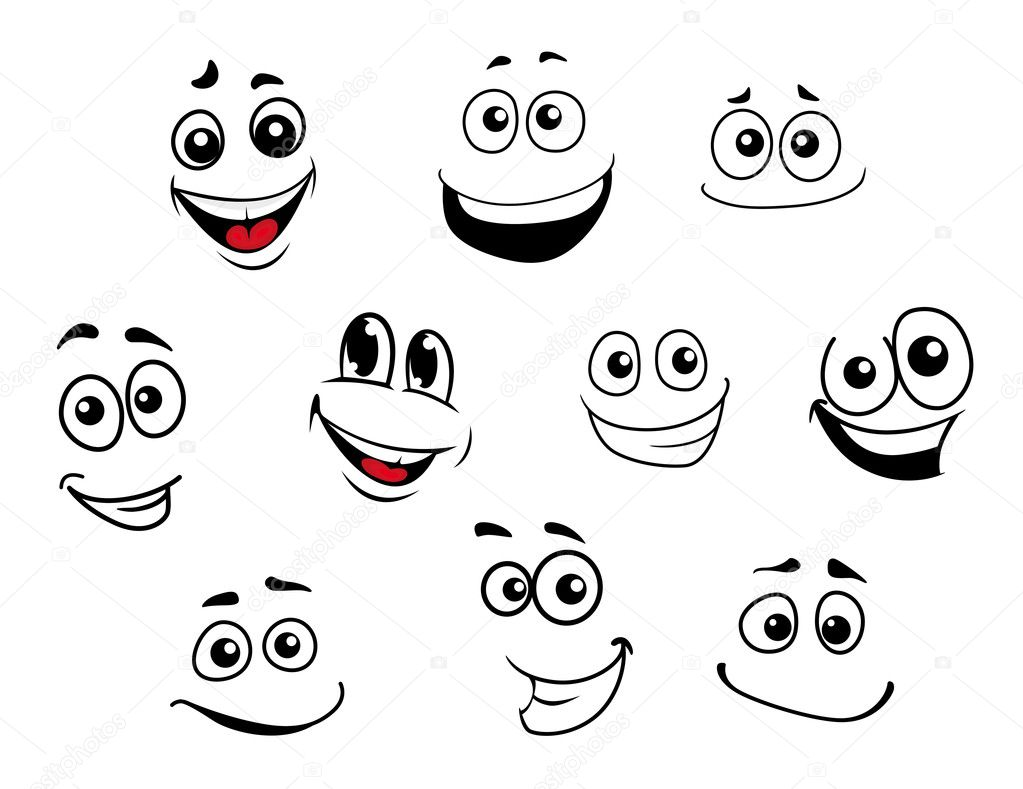

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Conjunto de Datos

In [2]:
df = pd.read_csv('../raw-data/OSF_socialmedia_data.csv', index_col=0)
df.drop('AutoPSMU', axis=1, inplace=True)
df.head()

Participant        Date      Day      Time     Session.Name  \
1       115091  05/02/2017  Tuesday  10:00:06  Daily questions   
2       115091  05/02/2017  Tuesday  12:02:48  Daily questions   
3       115091  05/02/2017  Tuesday  14:03:02  Daily questions   
4       115091  05/02/2017  Tuesday  16:34:28  Daily questions   
5       115091  05/02/2017  Tuesday  18:00:00  Daily questions   

   Notification.No  LifePak.Download.No  Responded  Completed.Session  \
1                1                    1          1                  1   
2                2                    1          1                  1   
3                3                    1          1                  1   
4                4                    1          1                  1   
5                5                    1          0                  0   

   Session.Instance  ... DeprMood  Loneliness  Concentrat  LossOfInt  \
1               1.0  ...     55.0        61.0        64.0       68.0   
2               2.0  ...     59.0        57.0        70.0       58.0   
3               3.0  ...     20.0        44.0        70.0       67.0   
4               4.0  ...     25.0        56.0        79.0       89.0   
5               NaN  ...      NaN         NaN         NaN        NaN   

   Inferior  Hopeless  Stress  PSMU  News  Active  
1      50.0      56.0    73.0  66.0  39.0    38.0  
2      37.0      56.0    67.0   0.0  27.0    23.0  
3      26.0      38.0    39.0  63.0  34.0    36.0  
4      30.0      20.0    60.0  67.0  29.0    23.0  
5       NaN       NaN     NaN   NaN   NaN     NaN  

[5 rows x 24 columns]

### Las 11 variables estudiadas (8 relacionadas a "depresión" y 3 relacionadas al uso de "Redes Sociales")

In [3]:
df2 = df.iloc[:,13:]
df2.head()

Fatigue  DeprMood  Loneliness  Concentrat  LossOfInt  Inferior  Hopeless  \
1     61.0      55.0        61.0        64.0       68.0      50.0      56.0   
2     28.0      59.0        57.0        70.0       58.0      37.0      56.0   
3     24.0      20.0        44.0        70.0       67.0      26.0      38.0   
4     63.0      25.0        56.0        79.0       89.0      30.0      20.0   
5      NaN       NaN         NaN         NaN        NaN       NaN       NaN   

   Stress  PSMU  News  Active  
1    73.0  66.0  39.0    38.0  
2    67.0   0.0  27.0    23.0  
3    39.0  63.0  34.0    36.0  
4    60.0  67.0  29.0    23.0  
5     NaN   NaN   NaN     NaN

### Estadísticas básicas de las 11 variables

In [4]:
df2.describe()

Fatigue     DeprMood   Loneliness   Concentrat    LossOfInt  \
count  8653.000000  8648.000000  8646.000000  8645.000000  8646.000000   
mean     36.990524    13.149861    11.971085    26.385772    25.501619   
std      29.717380    18.277533    16.962882    26.084848    26.272407   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      10.000000     0.000000     0.000000     2.000000     0.000000   
50%      30.000000     6.000000     5.000000    19.000000    18.000000   
75%      64.000000    20.000000    18.000000    45.000000    40.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

          Inferior     Hopeless       Stress         PSMU         News  \
count  8646.000000  8650.000000  8649.000000  8646.000000  8647.000000   
mean     10.583854    12.021734    20.646896    31.606523    20.804788   
std      15.485521    16.732938    23.192832    29.215807    24.890481   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       3.000000     5.000000    14.000000    24.000000    12.000000   
75%      17.000000    19.000000    30.000000    61.000000    31.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

            Active  
count  8645.000000  
mean     21.410642  
std      25.321793  
min       0.000000  
25%       0.000000  
50%      12.000000  
75%      33.000000  
max     100.000000

### Gráficas de Dispersión en formato de Diagrama de Matriz de las 11 Variables

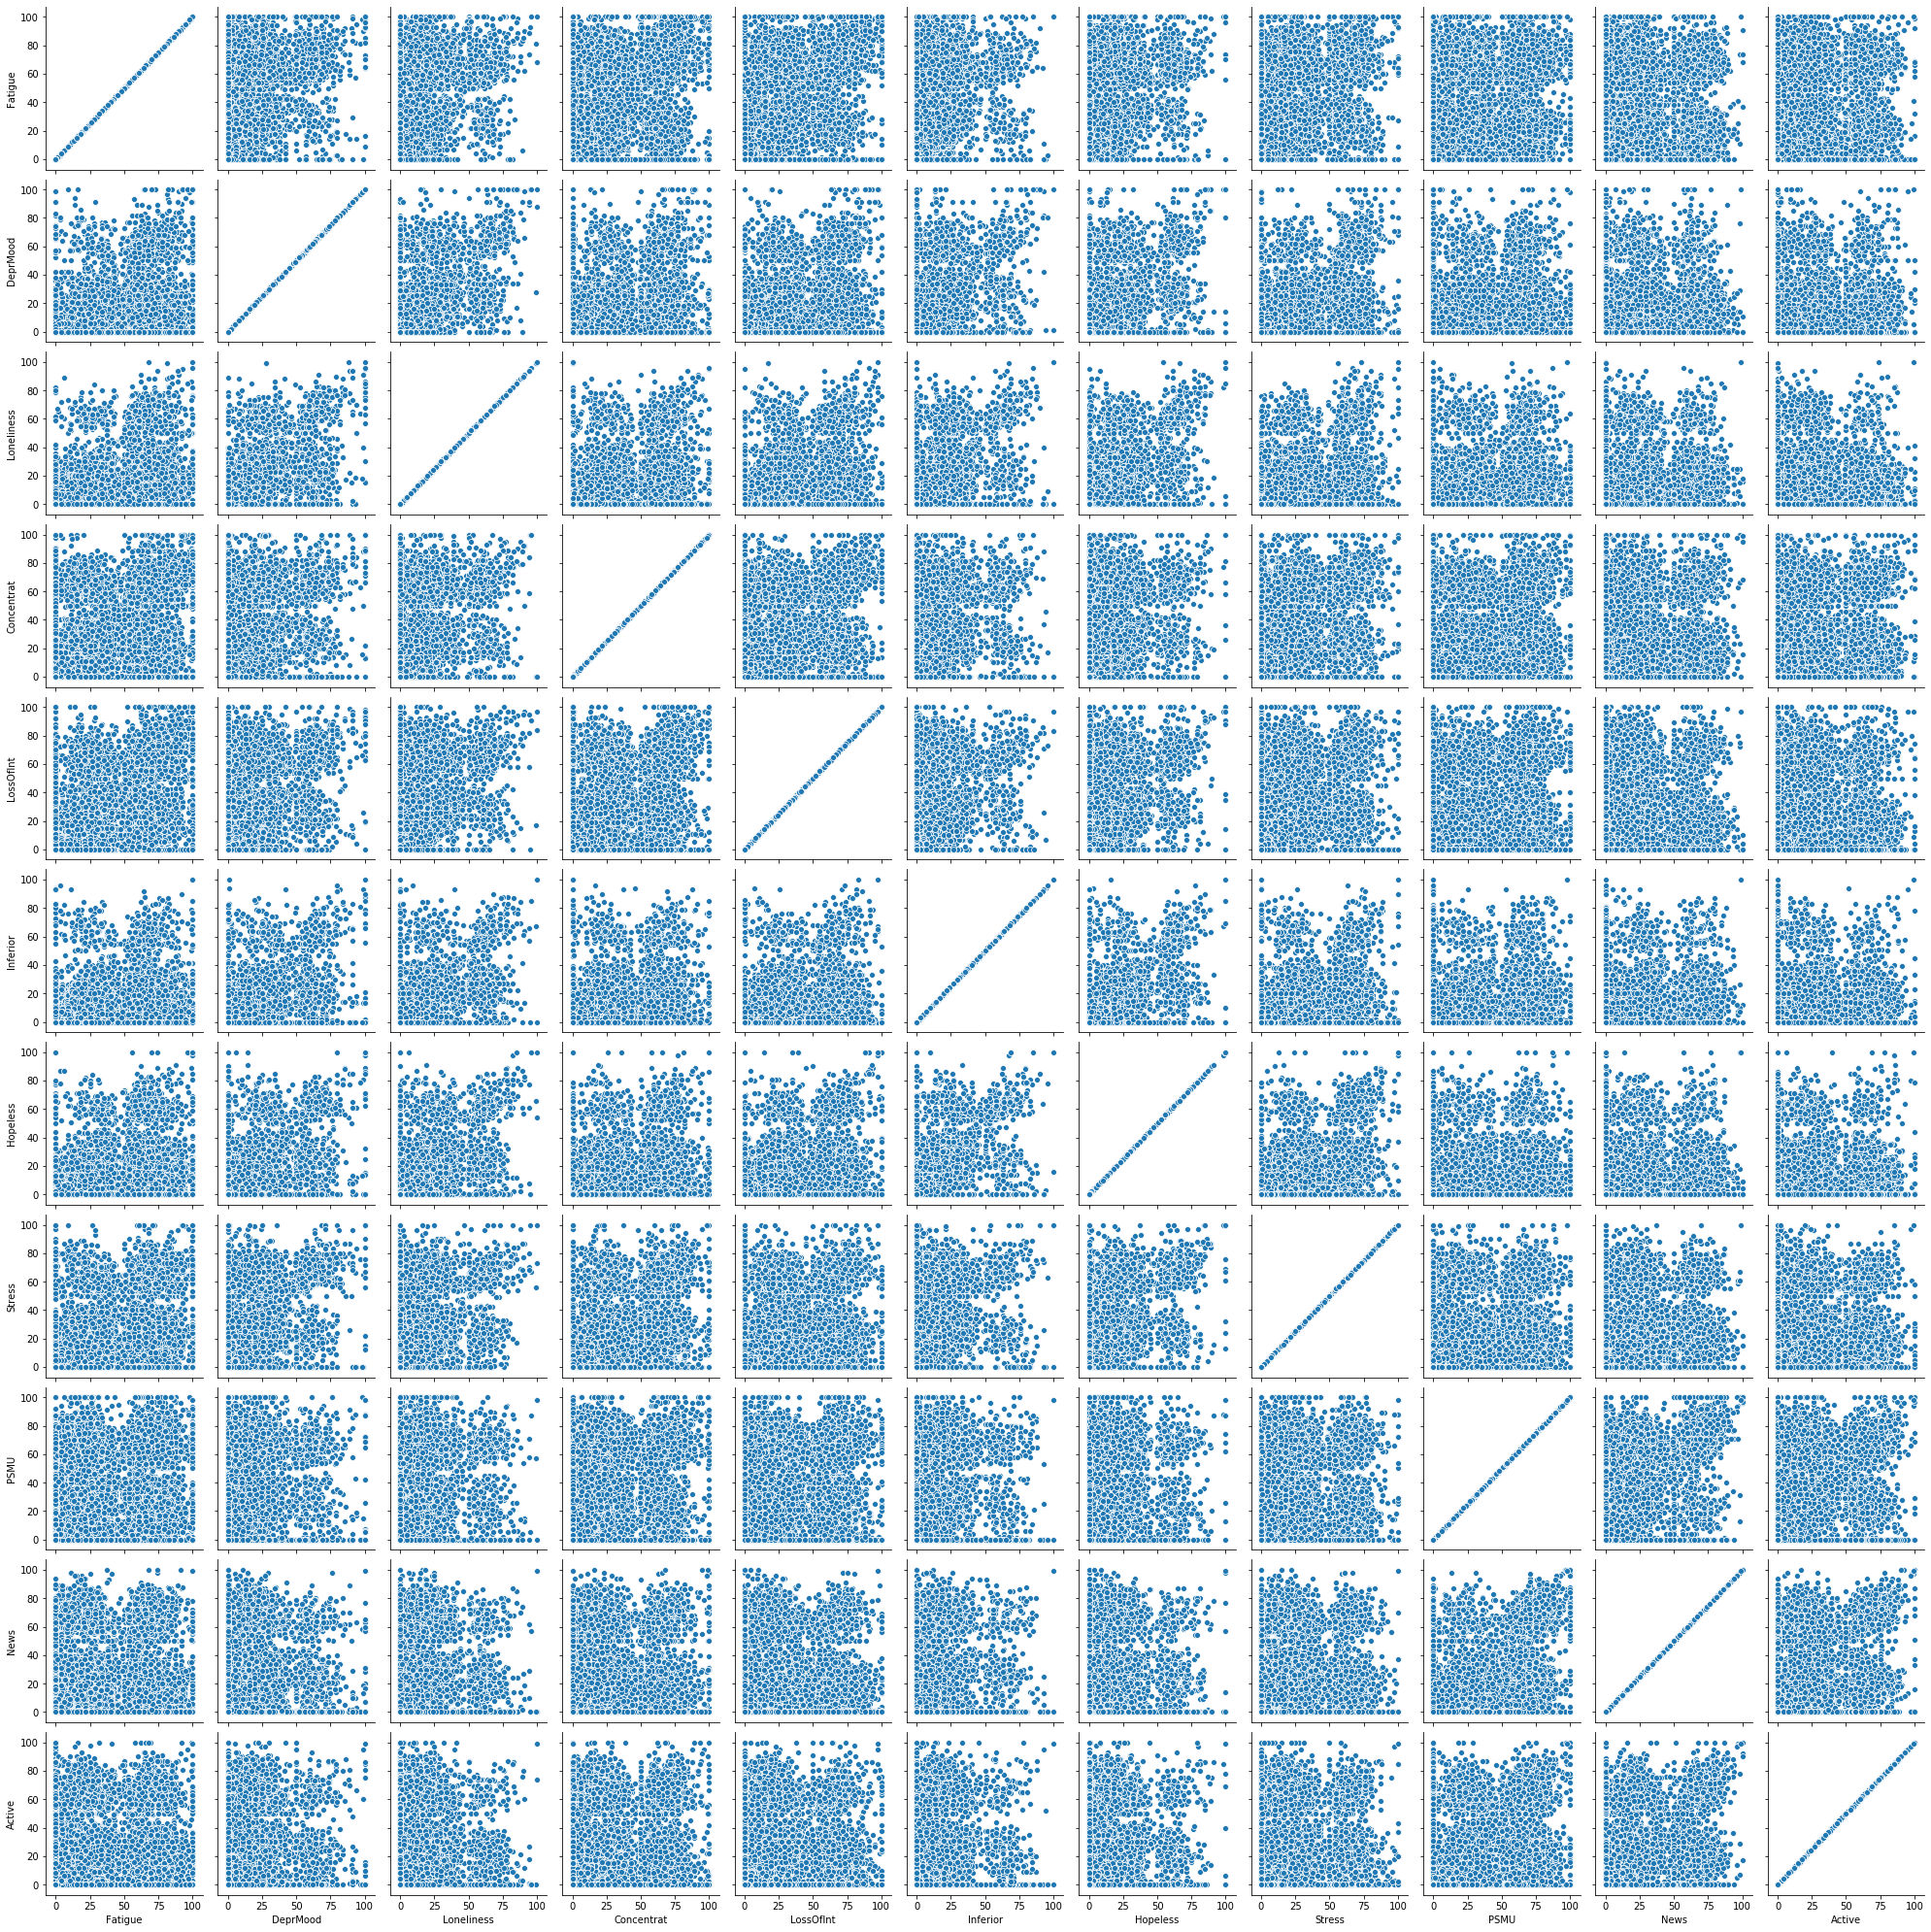

In [5]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)

### Medianas por participante

In [6]:
dfmedian=df.groupby('Participant').median()
dfmedian=dfmedian.iloc[:,7:]
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfmedian)

             Fatigue  DeprMood  Loneliness  Concentrat  LossOfInt  Inferior  \
Participant                                                                   
115091          54.0      17.0        17.0        27.0       56.0      16.0   
131183          55.0       0.0         0.0         0.0        0.0       0.0   
438907          64.0      19.0        17.0        25.5       63.0      18.0   
515070          26.5       9.0         8.5        25.0       13.0      11.0   
572172          13.5       3.0         7.5        12.5       21.5      32.5   
680605          61.0      10.0         0.0        52.0       35.0       0.0   
696084          60.0      13.0        13.0        25.5       23.5      14.0   
697356           0.0       0.0         0.0         0.0        0.0       0.0   
857523          22.0      21.0        20.0        21.0       21.0      21.0   
883656          23.0      18.0        18.0        18.0       19.0      18.0   
1102830          5.0       0.0         0.0         0

### Estadísticas descriptivas de las Medianas por participante

In [7]:
dfmedian.describe()

Fatigue    DeprMood  Loneliness  Concentrat   LossOfInt    Inferior  \
count  125.000000  125.000000  125.000000  125.000000  125.000000  125.000000   
mean    35.016000    9.120000    8.804000   20.456000   19.576000    7.948000   
std     23.919551   10.721624   10.533911   17.559463   17.982749   10.314769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     15.000000    0.000000    0.000000    4.500000    2.000000    0.000000   
50%     31.000000    6.000000    6.000000   19.000000   18.000000    2.000000   
75%     58.000000   17.000000   16.000000   28.000000   28.000000   14.000000   
max     83.000000   55.000000   55.000000   73.000000   72.000000   54.000000   

         Hopeless      Stress       PSMU        News      Active  
count  125.000000  125.000000  125.00000  125.000000  125.000000  
mean     8.624000   16.052000   27.94400   15.816000   17.008000  
std     10.853804   16.152227   22.67381   18.610561   19.320825  
min      0.000000    0.000000    0.00000    0.000000    0.000000  
25%      0.000000    0.000000   10.50000    0.000000    0.000000  
50%      3.000000   14.000000   23.50000   11.000000   13.500000  
75%     15.000000   23.000000   43.50000   22.000000   24.500000  
max     54.000000   64.000000   77.00000   76.000000   79.500000

### Diagrama de Matriz para las Medianas de las 11 Variables

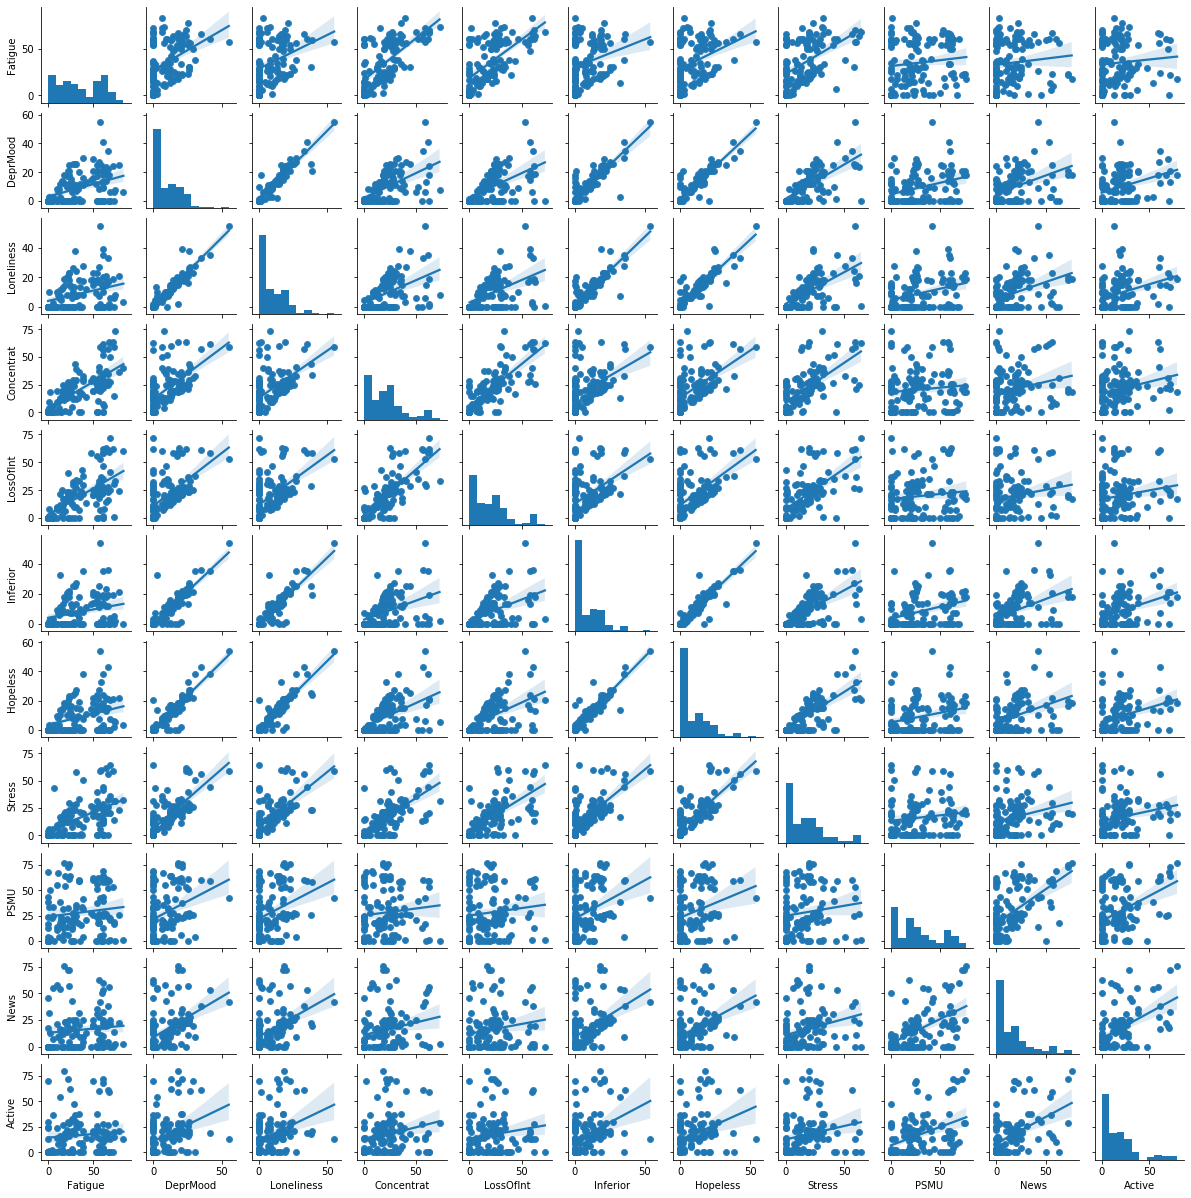

In [8]:
g = sns.PairGrid(dfmedian, height=1.5)
g.map_offdiag(sns.scatterplot)
g.map_offdiag(sns.regplot)
g.map_diag(plt.hist)

### Correlaciones de Pearson para las Medianas de las 11 Variables

Text(0.5, 1, 'Heatmap of Correlation Matrix - Medians by Participant')

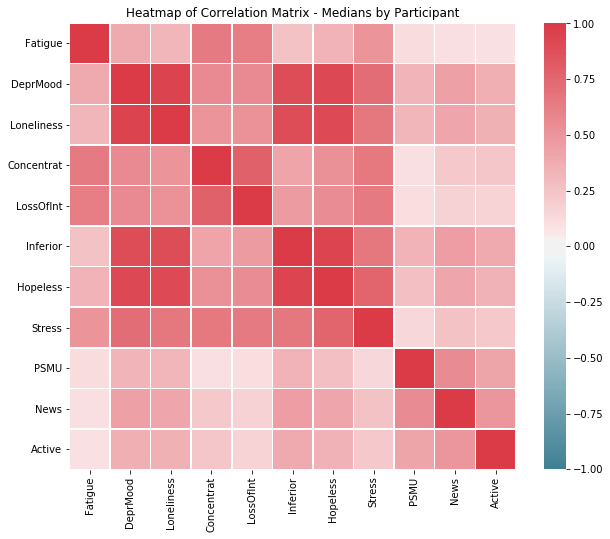

In [9]:
corr = dfmedian.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=1, vmin=-1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix - Medians by Participant')

In [10]:
print(corr)

             Fatigue  DeprMood  Loneliness  Concentrat  LossOfInt  Inferior  \
Fatigue     1.000000  0.388421    0.322116    0.655307   0.625990  0.259484   
DeprMood    0.388421  1.000000    0.949128    0.563854   0.566066  0.897216   
Loneliness  0.322116  0.949128    1.000000    0.512166   0.522927  0.897224   
Concentrat  0.655307  0.563854    0.512166    1.000000   0.782870  0.429613   
LossOfInt   0.625990  0.566066    0.522927    0.782870   1.000000  0.475468   
Inferior    0.259484  0.897216    0.897224    0.429613   0.475468  1.000000   
Hopeless    0.340326  0.921116    0.910543    0.525147   0.549720  0.938407   
Stress      0.508708  0.725804    0.664148    0.660468   0.655638  0.668883   
PSMU        0.120108  0.333257    0.325784    0.104082   0.115973  0.342550   
News        0.103047  0.438256    0.410461    0.220361   0.176854  0.456311   
Active      0.086697  0.360601    0.352487    0.235164   0.169266  0.388539   

            Hopeless    Stress      PSMU      News 

### Se observan correlaciones más significativas entre las siguientes variables:
DeprMood vs Loneliness

DeprMood vs Inferior

DeprMood vs Hopeless

DeprMood vs Stress

Loneliness vs Inferior (89,7%)

Loneliness vs Hopeless (91,1%)

Concentrat vs LossOfInt 

Inferior vs Hopeless (93,8%)

Hopeless vs Stress

### Regresión Lineal para las Medianas: y = DeprMood, X = Demás Variables

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets

label = dfmedian.DeprMood

dfmedian.drop('DeprMood', axis=1, inplace=True)

dfmedian.drop('Inferior', axis=1, inplace=True)       # Muy correlacionado con Loneliness (>90%)
dfmedian.drop('Hopeless', axis=1, inplace=True)       # Muy correlacionado con Loneliness (>90%)

print(dfmedian)

data_train, data_test, label_train, label_test = train_test_split(dfmedian, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

             Fatigue  Loneliness  Concentrat  LossOfInt  Stress  PSMU  News  \
Participant                                                                   
115091          54.0        17.0        27.0       56.0    25.0  24.0  14.0   
131183          55.0         0.0         0.0        0.0     0.0  62.0   0.0   
438907          64.0        17.0        25.5       63.0    20.0  61.0  19.0   
515070          26.5         8.5        25.0       13.0    12.5  14.0  42.5   
572172          13.5         7.5        12.5       21.5    17.0  38.0  54.5   
680605          61.0         0.0        52.0       35.0    41.0  39.0  10.0   
696084          60.0        13.0        25.5       23.5    14.0  63.5  33.0   
697356           0.0         0.0         0.0        0.0     3.5  24.0   0.0   
857523          22.0        20.0        21.0       21.0    20.0  73.0  72.0   
883656          23.0        18.0        18.0       19.0    20.0  75.0  72.0   
1102830          5.0         0.0         0.0        

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y.
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.01849836  0.86826012 -0.00569906  0.03818429  0.06641567  0.01512858
  0.02794369 -0.01903144] -1.267320337983838
Fatigue       6.860473e-01
Loneliness    4.589922e-38
Concentrat    8.003503e-01
LossOfInt     2.268268e-01
Stress        3.478708e-02
PSMU          8.664807e-01
News          1.449840e-01
Active        1.790546e-01
Name: P>|t|, dtype: float64


In [13]:
# Evaluación del Error Medio del primer ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_train) - y_train)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

RMSE of Linear Regression Model with Training Data: 2.70
RMSE of Linear Regression Model with Testing Data: 4.20


In [14]:
# R2 del primer ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.2f}'.format(reg.score(X_train, y_train)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.2f}'.format(reg.score(X_test, y_test)))

R2 Coefficient for Linear Regression Model with Training Data: 0.94
R2 Coefficient for Linear Regression Model with Testing Data: 0.85


### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [15]:
# Eliminación de 3 variables con alto p-value (> 0,6)

dfmedian.drop('Fatigue', axis=1, inplace=True)
dfmedian.drop('Concentrat', axis=1, inplace=True)
dfmedian.drop('PSMU', axis=1, inplace=True)
print(dfmedian)

data_train, data_test, label_train, label_test = train_test_split(dfmedian, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

             Loneliness  LossOfInt  Stress  News  Active
Participant                                             
115091             17.0       56.0    25.0  14.0    15.0
131183              0.0        0.0     0.0   0.0     0.0
438907             17.0       63.0    20.0  19.0    13.0
515070              8.5       13.0    12.5  42.5    32.5
572172              7.5       21.5    17.0  54.5    54.0
680605              0.0       35.0    41.0  10.0     0.0
696084             13.0       23.5    14.0  33.0    72.0
697356              0.0        0.0     3.5   0.0     0.0
857523             20.0       21.0    20.0  72.0    72.0
883656             18.0       19.0    20.0  72.0    29.0
1102830             0.0        0.0     0.0   7.0     0.0
1156365            11.0       12.0    11.0  17.0    16.0
1274514             0.0        1.0    31.5  13.5    20.0
1318587             0.0        0.0     0.0   0.0     0.0
1500743             7.0       34.0    29.0  15.0    24.0
1562380             0.0        

In [16]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.86982623  0.04705742  0.06803837  0.03738306 -0.01784869] -0.6754853274736945
Loneliness    9.479366e-40
LossOfInt     6.539030e-02
Stress        2.328622e-02
News          6.549492e-02
Active        1.462414e-01
Name: P>|t|, dtype: float64


In [17]:
# Eliminación de 1 variable con alto p-value (> 0,14)

dfmedian.drop('Active', axis=1, inplace=True)
print(dfmedian)

data_train, data_test, label_train, label_test = train_test_split(dfmedian, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

             Loneliness  LossOfInt  Stress  News
Participant                                     
115091             17.0       56.0    25.0  14.0
131183              0.0        0.0     0.0   0.0
438907             17.0       63.0    20.0  19.0
515070              8.5       13.0    12.5  42.5
572172              7.5       21.5    17.0  54.5
680605              0.0       35.0    41.0  10.0
696084             13.0       23.5    14.0  33.0
697356              0.0        0.0     3.5   0.0
857523             20.0       21.0    20.0  72.0
883656             18.0       19.0    20.0  72.0
1102830             0.0        0.0     0.0   7.0
1156365            11.0       12.0    11.0  17.0
1274514             0.0        1.0    31.5  13.5
1318587             0.0        0.0     0.0   0.0
1500743             7.0       34.0    29.0  15.0
1562380             0.0        0.0    43.0   0.0
1875048            18.0       58.0    27.0   0.0
1950924            15.0       27.0    29.0  22.0
2042298             

In [18]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [0.86513047 0.04661048 0.07046721 0.02875363] -0.8217983824083923
Loneliness    9.743290e-40
LossOfInt     9.873166e-02
Stress        1.983056e-02
News          2.119160e-01
Name: P>|t|, dtype: float64


In [19]:
# Eliminación de 1 variable con alto p-value (> 0,2)

dfmedian.drop('News', axis=1, inplace=True)
print(dfmedian)

data_train, data_test, label_train, label_test = train_test_split(dfmedian, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

             Loneliness  LossOfInt  Stress
Participant                               
115091             17.0       56.0    25.0
131183              0.0        0.0     0.0
438907             17.0       63.0    20.0
515070              8.5       13.0    12.5
572172              7.5       21.5    17.0
680605              0.0       35.0    41.0
696084             13.0       23.5    14.0
697356              0.0        0.0     3.5
857523             20.0       21.0    20.0
883656             18.0       19.0    20.0
1102830             0.0        0.0     0.0
1156365            11.0       12.0    11.0
1274514             0.0        1.0    31.5
1318587             0.0        0.0     0.0
1500743             7.0       34.0    29.0
1562380             0.0        0.0    43.0
1875048            18.0       58.0    27.0
1950924            15.0       27.0    29.0
2042298             2.0        7.0     5.5
2184694            15.0       16.0    21.0
2396819            10.0        8.0     6.0
2541525    

### Modelo Final Medianas

In [20]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [0.88876035 0.04602871 0.06911447] -0.5232605721393213
Loneliness    3.255015e-43
LossOfInt     6.826338e-02
Stress        1.923526e-02
Name: P>|t|, dtype: float64


In [21]:
# Evaluación del Error Medio del último ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_train) - y_train)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

RMSE of Linear Regression Model with Training Data: 2.80
RMSE of Linear Regression Model with Testing Data: 4.14


In [22]:
# R2 del último ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.2f}'.format(reg.score(X_train, y_train)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.2f}'.format(reg.score(X_test, y_test)))

R2 Coefficient for Linear Regression Model with Training Data: 0.93
R2 Coefficient for Linear Regression Model with Testing Data: 0.85


### Conclusión: El coeficiente de determinación (R2) del modelo ajustado para las "medianas" es alto (85,2%), indicando que el ajuste puede ser considerado aceptable bajo un punto de vista estadístico.
### DeprMood = -0,52 + 0,89 Loneliness + 0,05 LossOfInt + 0,07 Stress

###    

### Medias por participante

In [23]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,7:]
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfmean)
print(dfmean.shape)

               Fatigue   DeprMood  Loneliness  Concentrat  LossOfInt  \
Participant                                                            
115091       45.155844  20.454545   23.285714   37.272727  47.675325   
131183       36.288136   3.474576    0.389831   19.508475  14.508475   
438907       51.040816  26.285714   21.833333   35.729167  50.979592   
515070       34.865385  12.692308   14.076923   32.903846  16.038462   
572172       18.272727  10.738636    9.375000   14.352273  25.761364   
680605       60.894737  14.915789    3.663158   46.852632  37.473684   
696084       46.555556  12.083333   13.263889   35.333333  34.083333   
697356        3.870370   1.259259    0.240741    1.814815   0.833333   
857523       31.365591  21.419355   20.645161   24.677419  23.741935   
883656       32.325843  17.696629   18.887640   21.370787  24.820225   
1102830      28.957447   3.382979    1.702128   22.702128  21.106383   
1156365      15.303371  11.460674   11.213483   12.741573  12.28

9873359       1.200000   3.564706   3.929412  10.870588   2.447059   7.588235  
(125, 11)


### Estadísticas descriptivas de las Medias por participante

In [24]:
dfmean.describe()

Fatigue    DeprMood  Loneliness  Concentrat   LossOfInt    Inferior  \
count  125.000000  125.000000  125.000000  125.000000  125.000000  125.000000   
mean    37.069569   13.014824   11.900892   26.564307   25.175316   10.360674   
std     17.375236   11.226504   11.066729   14.376944   14.705502   10.527341   
min      0.802469    0.000000    0.000000    0.474359    0.407407    0.000000   
25%     24.202532    3.227848    2.176471   15.574713   13.000000    1.319149   
50%     38.150000   11.185185    9.140625   25.810127   24.543478    6.448276   
75%     49.244186   21.173913   19.063492   35.333333   34.872340   17.231884   
max     78.378947   54.141176   53.788235   70.562500   70.224138   52.658824   

         Hopeless      Stress        PSMU        News      Active  
count  125.000000  125.000000  125.000000  125.000000  125.000000  
mean    11.852067   20.559635   31.267592   20.329226   21.265517  
std     10.889732   14.531147   14.076512   15.665447   15.387645  
min      0.000000    0.180556    3.342857    0.308642    0.314815  
25%      2.945946    8.222222   21.041667    6.705882    9.189189  
50%      8.690909   19.634921   30.159420   16.566265   20.867647  
75%     18.049383   32.277108   38.915493   31.017241   28.971831  
max     52.952941   61.482353   75.413043   72.393939   77.863636

### Diagrama de Matriz para las Medias de las 11 Variables

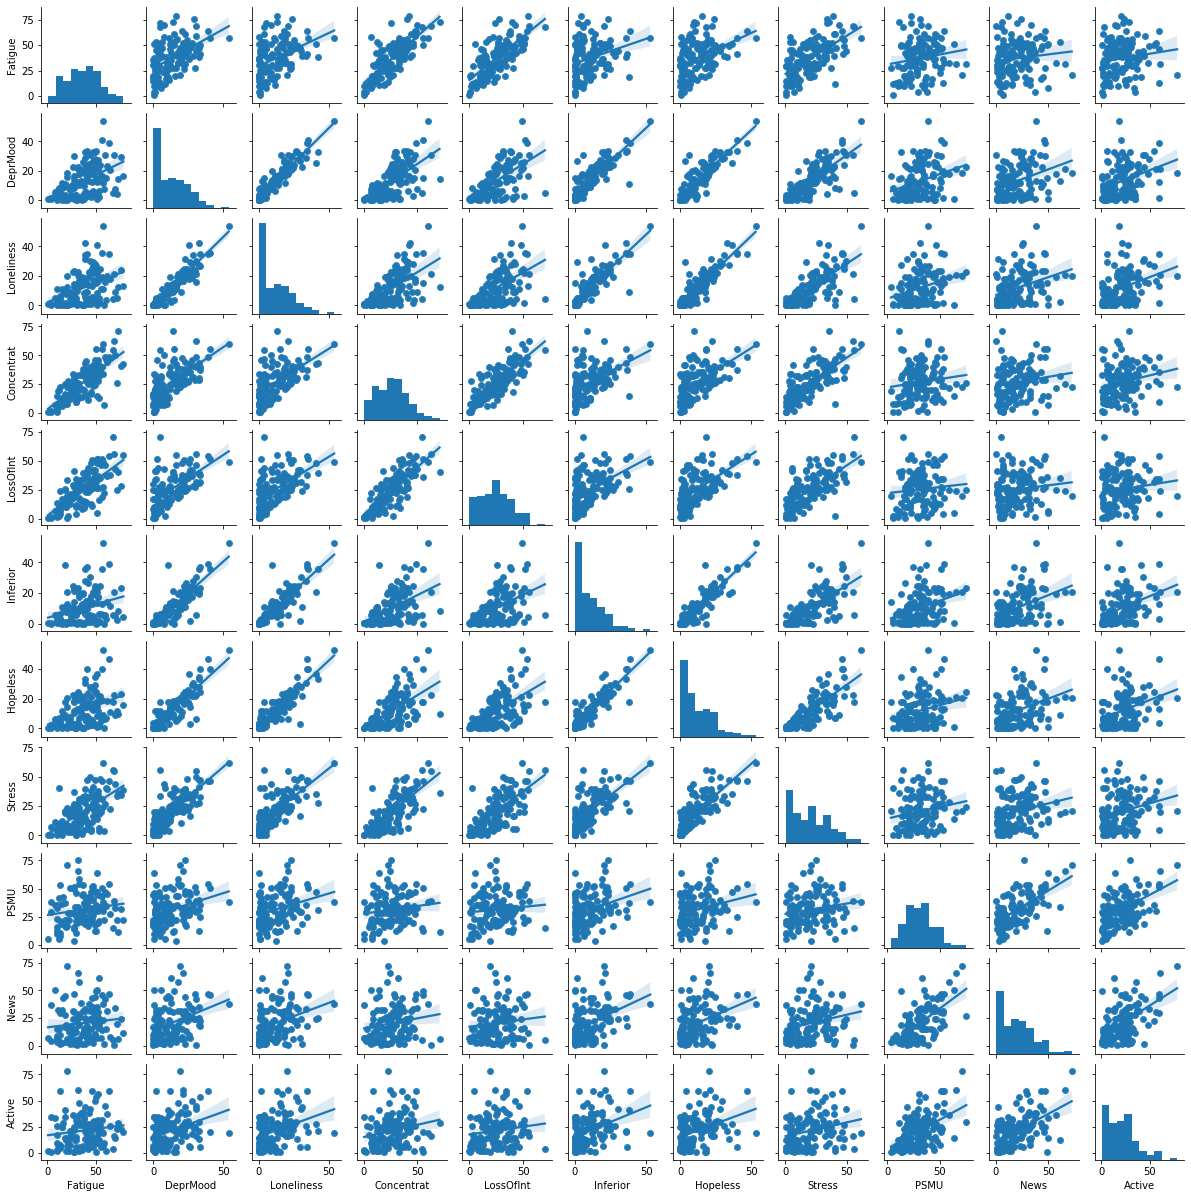

In [25]:
g = sns.PairGrid(dfmean, height=1.5)
g.map_offdiag(sns.scatterplot)
g.map_offdiag(sns.regplot)
g.map_diag(plt.hist)

### Diferencias entre Medias y Medianas

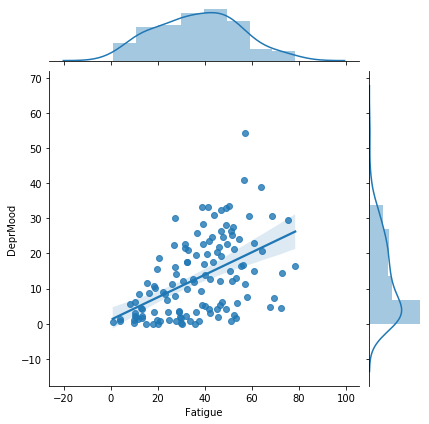

In [26]:
gridA = sns.JointGrid(x="Fatigue", y="DeprMood", data=dfmean, height=6)
gridA=gridA.plot_joint(sns.regplot)
gridA = gridA.plot_marginals(sns.distplot)

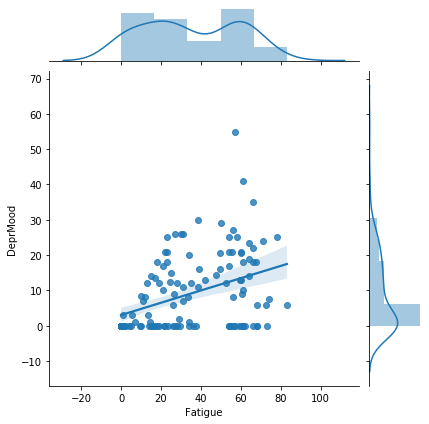

In [27]:
dfmedian=df.groupby('Participant').median()
gridA = sns.JointGrid(x="Fatigue", y="DeprMood", data=dfmedian, height=6)
gridA=gridA.plot_joint(sns.regplot)
gridA = gridA.plot_marginals(sns.distplot)

### Correlaciones de Pearson para las Medias de las 11 Variables

Text(0.5, 1, 'Heatmap of Correlation Matrix - Means by Participant')

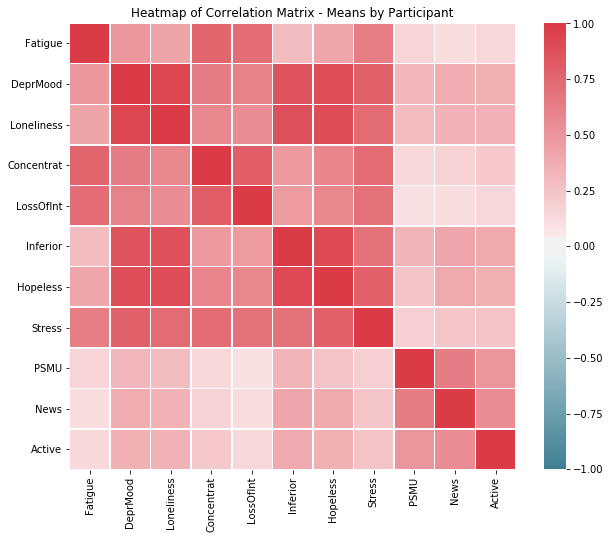

In [28]:
corr = dfmean.corr()
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=1, vmin=-1,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix - Means by Participant')

In [29]:
print(corr)

             Fatigue  DeprMood  Loneliness  Concentrat  LossOfInt  Inferior  \
Fatigue     1.000000  0.495345    0.414804    0.765514   0.724143  0.293907   
DeprMood    0.495345  1.000000    0.936036    0.637417   0.608769  0.863211   
Loneliness  0.414804  0.936036    1.000000    0.584479   0.554562  0.867703   
Concentrat  0.765514  0.637417    0.584479    1.000000   0.800544  0.478280   
LossOfInt   0.724143  0.608769    0.554562    0.800544   1.000000  0.473098   
Inferior    0.293907  0.863211    0.867703    0.478280   0.473098  1.000000   
Hopeless    0.408622  0.886898    0.903657    0.587926   0.584365  0.906732   
Stress      0.629144  0.783857    0.727051    0.729662   0.694472  0.687918   
PSMU        0.158636  0.314356    0.296012    0.139407   0.100335  0.328685   
News        0.115158  0.372365    0.340172    0.169474   0.124075  0.411115   
Active      0.137786  0.353328    0.351500    0.220547   0.142297  0.386622   

            Hopeless    Stress      PSMU      News 

### Se observan correlaciones más significativas entre las siguientes variables:

Fatigue vs Concentrat

Fatigue vs LossOfInt

DeprMood vs Loneliness

DeprMood vs Inferior

DeprMood vs Hopeless

DeprMood vs Stress

Loneliness vs Inferior

Loneliness vs Hopeless (90,3%)

Loneliness vs Stress

Concentrat vs LossOfInt 

Inferior vs Hopeless (90,7%)

Hopeless vs Stress

### Regresión Lineal para las Medias: y = DeprMood, X = Demás Variables

In [30]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,7:]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets

label = dfmean.DeprMood

dfmean.drop('DeprMood', axis=1, inplace=True)

dfmean.drop('Hopeless', axis=1, inplace=True)        # Muy correlacionado con Loneliness & Inferior (>90%)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [31]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting

print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.03537958  0.72354972  0.01048137  0.02408368  0.09473636  0.11099611
  0.0120237   0.04317268 -0.02928978] -1.6294791108403928
Fatigue       5.289058e-01
Loneliness    1.487451e-17
Concentrat    8.718913e-01
LossOfInt     7.371245e-01
Inferior      2.110542e-01
Stress        1.455785e-02
PSMU          6.770204e-01
News          1.375821e-01
Active        2.325836e-01
Name: P>|t|, dtype: float64


In [32]:
# Evaluación del Error Medio del primer ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_train) - y_train)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

RMSE of Linear Regression Model with Training Data: 3.25
RMSE of Linear Regression Model with Testing Data: 3.82


In [33]:
# R2 del primer ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.2f}'.format(reg.score(X_train, y_train)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.2f}'.format(reg.score(X_test, y_test)))

R2 Coefficient for Linear Regression Model with Training Data: 0.92
R2 Coefficient for Linear Regression Model with Testing Data: 0.88


### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [34]:
# Eliminación de 3 variables con alto p-value (> 0,6)

dfmean.drop('Concentrat', axis=1, inplace=True)
dfmean.drop('LossOfInt', axis=1, inplace=True)
dfmean.drop('PSMU', axis=1, inplace=True)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [35]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.05296069  0.72618582  0.10105168  0.1183763   0.04523268 -0.02575928] -1.3597805057372572
Fatigue       1.649350e-01
Loneliness    3.935805e-18
Inferior      1.885220e-01
Stress        4.399557e-03
News          1.482647e-01
Active        1.518306e-01
Name: P>|t|, dtype: float64


In [36]:
# Eliminación de 2 variables con alto p-value (> 0,16)

dfmean.drop('Fatigue', axis=1, inplace=True)
dfmean.drop('Inferior', axis=1, inplace=True)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [37]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [ 0.79240027  0.17000706  0.0549165  -0.02964275] -0.33896542108034566
Loneliness    2.448341e-31
Stress        2.318365e-07
News          4.755290e-02
Active        1.940478e-01
Name: P>|t|, dtype: float64


In [38]:
# Eliminación de 1 variable con alto p-value (> 0,19)

dfmean.drop('Active', axis=1, inplace=True)
# print(dfmean)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

# print(X_train)
# print(y_train)

### Modelo Final Medias

In [39]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

Coeff and intercept: [0.78621809 0.17273146 0.03981402] -0.6320515227503858
Loneliness    2.803085e-31
Stress        4.171016e-07
News          1.322946e-01
Name: P>|t|, dtype: float64


### Análisis de Residuos Modelo Final

Text(0.5, 1.0, 'Gráfica de Residuos')

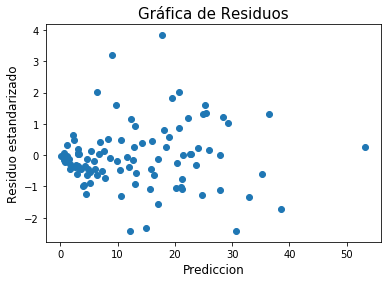

In [40]:
#create instance of influence
influence = fitt.get_influence()

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

# print(fitt.summary())
# print(fitt.predict())
# print(standardized_residuals)

plt.scatter(fitt.predict(), standardized_residuals)
plt.xlabel('Prediccion', fontsize=12)
plt.ylabel('Residuo estandarizado', fontsize=12)
plt.title('Gráfica de Residuos', fontsize=15)

Text(0.5, 1.0, 'Histograma Residuos Estandarizados')

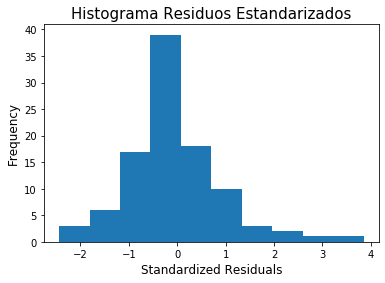

In [41]:
plt.hist(standardized_residuals)
plt.xlabel('Standardized Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histograma Residuos Estandarizados', fontsize=15)

Text(0.5, 1.0, 'Normal Q-Q Plot')

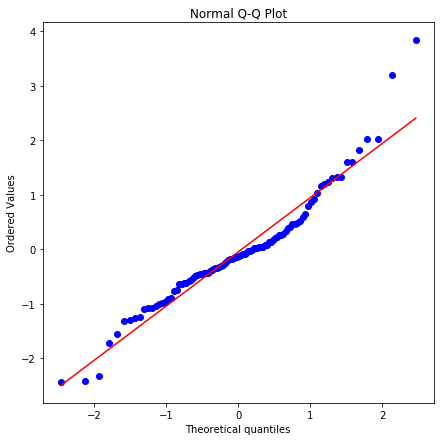

In [42]:
!pip install scipy
from scipy import stats

plt.figure(figsize=(7,7))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

### Se observan 2 outliers en el análisis de residuos del modelo final.

### Próximos pasos: Eliminar estos 2 outliers del conjunto de datos y volver a ajustar el modelo final.

In [43]:
# Identificación residuos "outlier"

predictions = result.predict(data_train)
residuals = y_train - predictions
residuals

# Índices de los residuos "outlier"
indexNames = residuals[ standardized_residuals > 3 ].index
print(indexNames)
firstoutlier=indexNames[0]
secondoutlier=indexNames[1]
print("Index Primer Outlier: {}".format(firstoutlier))
print("Index Segun Outlier: {}".format(secondoutlier))

Int64Index([6300494, 5089192], dtype='int64', name='Participant')
Index Primer Outlier: 6300494
Index Segun Outlier: 5089192


In [44]:
# Borrar estos índices del conjunto de datos
data_train_withoutoutliers = data_train.drop([firstoutlier, secondoutlier]) 
label_train_withoutoutliers = label_train.drop([firstoutlier, secondoutlier])

Coeff and intercept: [0.78092564 0.17861542 0.03552502] -0.8533975886761258
Loneliness    2.704761e-35
Stress        1.072022e-08
News          2.106738e-01
Name: P>|t|, dtype: float64


Text(0.5, 1.0, 'Gráfica de Residuos')

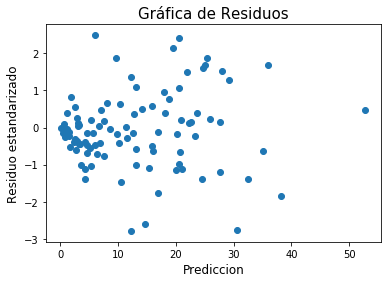

In [45]:
# Volver a ajustar el Modelo Final sin Outliers

reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train_withoutoutliers, label_train_withoutoutliers)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train_withoutoutliers, data_train_withoutoutliers)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

#create instance of influence
influence = fitt.get_influence()

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

# print(fitt.summary())
# print(fitt.predict())
# print(standardized_residuals)

plt.scatter(fitt.predict(), standardized_residuals)
plt.xlabel('Prediccion', fontsize=12)
plt.ylabel('Residuo estandarizado', fontsize=12)
plt.title('Gráfica de Residuos', fontsize=15)

Text(0.5, 1.0, 'Histograma Residuos Estandarizados')

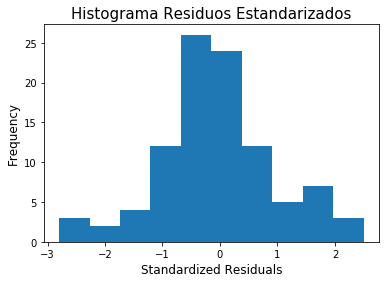

In [46]:
plt.hist(standardized_residuals)
plt.xlabel('Standardized Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histograma Residuos Estandarizados', fontsize=15)

Text(0.5, 1.0, 'Normal Q-Q Plot')

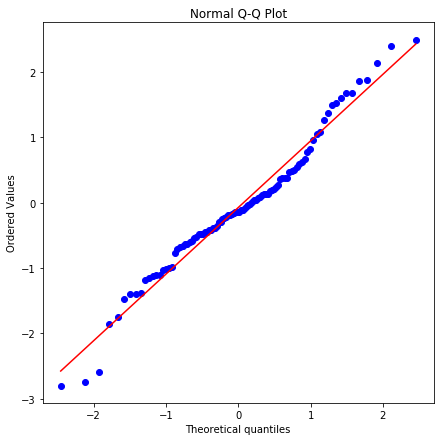

In [47]:
plt.figure(figsize=(7,7))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

### Conclusión del Análisis de Residuos: Tras eliminación de los 2 outliers observados, el Análisis de Residuos puede ser considerado satisfactorio bajo un punto de vista estadístico.

### Evaluación Final Modelo "Medias"

In [48]:
# Evaluación del Error Medio del último ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(data_train_withoutoutliers) - label_train_withoutoutliers)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

RMSE of Linear Regression Model with Training Data: 2.91
RMSE of Linear Regression Model with Testing Data: 4.00


In [49]:
# R2 del último ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.2f}'.format(reg.score(data_train_withoutoutliers, label_train_withoutoutliers)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.2f}'.format(reg.score(X_test, y_test)))

R2 Coefficient for Linear Regression Model with Training Data: 0.93
R2 Coefficient for Linear Regression Model with Testing Data: 0.87


### Conclusión: El coeficiente de determinación (R2) del modelo ajustado para las "medias" es alto (87,4%). Como el Análisis de Residuos también ha sido considerado satisfactorio, se valida el modelo bajo un punto de vista estadístico.

### DeprMood  =  -0,85 + 0,78 Loneliness + 0,18 Stress + 0,04 News